In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [4]:
df = pd.read_csv( r"E:\data\student_placement_dataset_1000.csv")
df.head()

,student_name,student_id,cgpa,coding_skill,communication_skill,aptitude_skill,problem_solving,projects_count,internship_count,internship_company_level,certification_count,certification_company_level,technical_skills,tools_known,placement_status,placement_probability
0,Riya,CSE0001,8.77,9,7,5,9,2,3,1,0,2,Java,VS Code,1,0.89
1,Ananya,CSE0002,7.65,7,6,5,6,5,3,3,0,2,SQL,Eclipse,1,0.69
2,Rohit,CSE0003,6.76,7,8,7,8,2,2,2,3,3,Java,VS Code,1,0.73
3,Neha,CSE0004,9.69,8,8,9,8,3,3,3,3,1,SQL,AWS,1,0.86
4,Rohit,CSE0005,8.25,7,7,7,8,5,2,4,2,1,Python,Eclipse,1,0.78


In [5]:
df["placement_status"] = df["placement_status"].map({
    "Placed": 1,
    "Not Placed": 0
})


In [6]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df.groupby("placement_status")[numeric_cols].mean()


,cgpa,coding_skill,communication_skill,aptitude_skill,problem_solving,projects_count,internship_count,internship_company_level,certification_count,certification_company_level,placement_status,placement_probability
placement_status,,,,,,,,,,,,


In [7]:
df.shape


(1000, 16)

In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_name                 1000 non-null   object 
 1   student_id                   1000 non-null   object 
 2   cgpa                         1000 non-null   float64
 3   coding_skill                 1000 non-null   int64  
 4   communication_skill          1000 non-null   int64  
 5   aptitude_skill               1000 non-null   int64  
 6   problem_solving              1000 non-null   int64  
 7   projects_count               1000 non-null   int64  
 8   internship_count             1000 non-null   int64  
 9   internship_company_level     1000 non-null   int64  
 10  certification_count          1000 non-null   int64  
 11  certification_company_level  1000 non-null   int64  
 12  technical_skills             1000 non-null   object 
 13  tools_known        

In [9]:
df.describe()


,cgpa,coding_skill,communication_skill,aptitude_skill,problem_solving,projects_count,internship_count,internship_company_level,certification_count,certification_company_level,placement_status,placement_probability
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000
mean,7.91109,6.965000,6.969000,7.062000,6.953000,3.475000,1.477000,2.519000,1.923000,1.527000,NaN,0.727490
std,1.11239,1.406326,1.441568,1.407884,1.413786,1.700078,1.131703,1.126458,1.392483,1.124516,NaN,0.076918
min,6.00000,5.000000,5.000000,5.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.530000
25%,6.98000,6.000000,6.000000,6.000000,6.000000,2.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.670000
50%,7.90500,7.000000,7.000000,7.000000,7.000000,3.000000,1.000000,3.000000,2.000000,2.000000,NaN,0.730000
75%,8.89000,8.000000,8.000000,8.000000,8.000000,5.000000,3.000000,4.000000,3.000000,3.000000,NaN,0.780000
max,9.80000,9.000000,9.000000,9.000000,9.000000,6.000000,3.000000,4.000000,4.000000,3.000000,NaN,0.920000


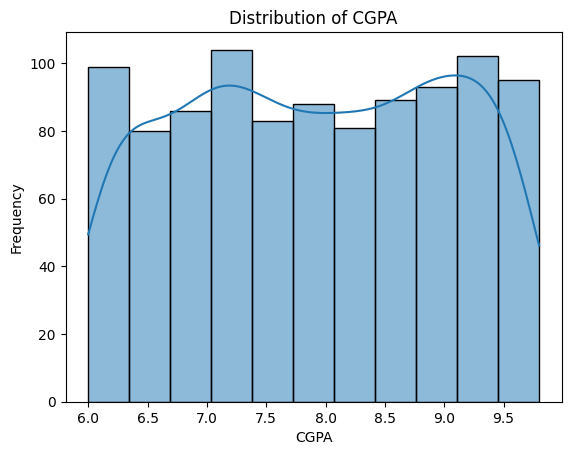

In [10]:
sns.histplot(df['cgpa'], kde=True)
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()


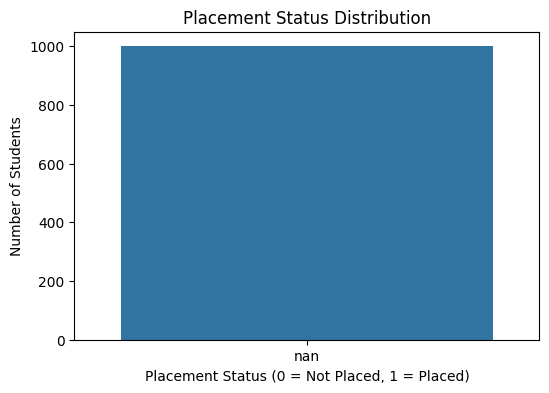

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.countplot(
    x=df['placement_status'].astype(str),
    data=df
)

plt.title("Placement Status Distribution")
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("Number of Students")
plt.show()


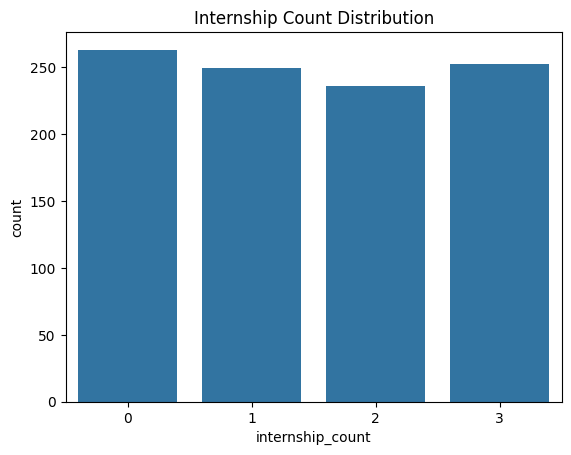

In [12]:
sns.countplot(x='internship_count', data=df)
plt.title("Internship Count Distribution")
plt.show()


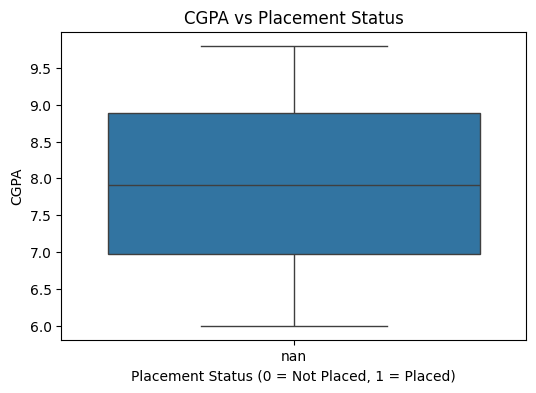

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.boxplot(
    data=df,
    x=df['placement_status'].astype(str),  # force categorical
    y='cgpa'
)

plt.title("CGPA vs Placement Status")
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("CGPA")
plt.show()


In [11]:
df['total_skill_score'] = (
    df['coding_skill'] +
    df['communication_skill'] +
    df['aptitude_skill'] +
    df['problem_solving']
)

df['experience_score'] = df['internship_count'] + df['projects_count']

df['has_internship'] = df['internship_count'].apply(lambda x: 1 if x > 0 else 0)

df[['total_skill_score', 'experience_score', 'has_internship']].head()


,total_skill_score,experience_score,has_internship
0,30,5,1
1,24,8,1
2,30,4,1
3,33,6,1
4,29,7,1


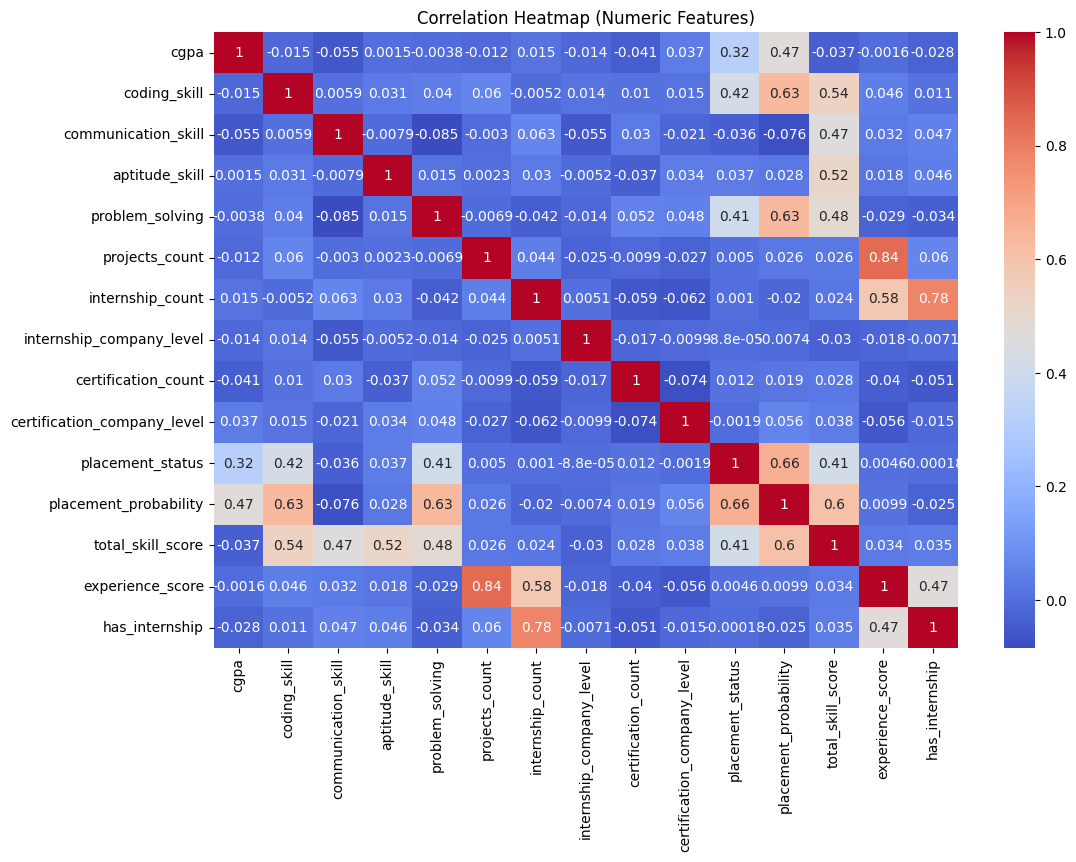

In [14]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
